In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [3]:
df_orders = pd.read_csv('orders.csv', sep=';')

In [4]:
df_items = pd.read_csv('items.csv', sep=';')

# Data Cleaning 

In [6]:
##1.a Clean None Orders 
df_orders.head(3)

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
0,2000093387,2020-04-24 00:00:00,GOPAY_CARD,S101,1,NaN,3.506048,0.000000,3.496395,E-COMMER,RUN.huC,RUN.huO,top4running.hu,2020-04-24 21:50:00
1,2000093387,2020-04-24 00:00:00,GOPAY_CARD,S113,1,NaN,-0.705913,0.000000,-0.717209,E-COMMER,RUN.huC,RUN.huO,top4running.hu,2020-04-24 21:50:00
2,2000093388,2020-04-24 00:00:00,COD,ZB00089178,1,NaN,5.829845,2.209302,6.472868,E-COMMER,FTB.czC,FTB.czO,11teamsports.cz,2020-04-24 21:45:00


In [5]:
#df_orders.shape
#df_orders.isnull().sum()
df_orders_n = df_orders.drop(['gift_quantity'], axis =1)
#df_orders_n.isnull().sum()
df_orders_nn = df_orders_n.dropna()
#df_orders_nn.isnull().sum()
#df_orders_nn.shape

In [6]:
###1.bCleaning none items 
df_items.head(3)

,item_code,item_name,style,brand_id,name,group0_id,group0,group1_id,group1,group2_id,group2,category,gender,age,color,size
0,ZB00210807,Studio Metallic LS Top,51951501,86,Puma,200.0,Apparel,230.0,T-Shirts,233.0,Longsleeved (LS) shirts,fitness,women,adults,Black,L
1,ZB00210813,TRAIN TECH EVOKNIT SS TEE,52011101,86,Puma,200.0,Apparel,230.0,T-Shirts,0.0,NaN,fitness,men,adults,Black,S
2,ZB00210815,TRAIN TECH EVOKNIT SS TEE,52011123,86,Puma,200.0,Apparel,230.0,T-Shirts,0.0,NaN,fitness,men,adults,Orange,L


In [7]:
#df_items.isnull().sum()
df_items_n = df_items.drop(['group2'], axis =1)
#df_items_n.isnull().sum()
#df_items_n.shape
df_items_nn = df_items_n.dropna()
#df_items_nn.shape
#df_orders_nn['site'].value_counts()

In [8]:
df_orders_nn['store_ca'], df_orders_nn['location'] = df_orders_nn['site'].str.split('.', 1).str

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/526415255.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_orders_nn['store_ca'], df_orders_nn['location'] = df_orders_nn['site'].str.split('.', 1).str
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/526415255.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_orders_nn['store_ca'], df_orders_nn['location'] = df_orders_nn['site'].str.split('.', 1).str
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/526415255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_nn['store_ca'], df_orders_nn['location'] 

In [9]:
#df_orders_nn['location'].value_counts
df_orders_nn['store_ca'].value_counts()

11teamsports    1039972
top4running      724126
top4fitness      205861
top4football      81819
top4sport         52182
tint-store        23857
other                46
Name: store_ca, dtype: int64

In [10]:
df_orders_nn['country']=df_orders_nn['location']

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/1776778040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_nn['country']=df_orders_nn['location']


In [11]:
df_orders_nn['country'] = df_orders_nn.country.replace({'cz':'Czech Republic', 
                                          'sk':'Slovakia',
                                          'hu':'Hungary',
                                          'ro':'Romania',
                                          'de':'Germany',
                                          'es':'Spain',
                                          'fr':'France',
                                          'it':'Italy',
                                          'hr':'Croatia',
                                          'ie':'Ireland',
                                          'dk':'Denmark',
                                          'nl':'Netherlands',
                                          'at':'Austria',
                                          'se':'Sweden',
                                          'pt':'Portugal',
                                          'pl':'Poland',
                                          'be':'Belgium',
                                          'fi':'Finland', 
                                          'si':'Slovenia',
                                          'uk':'United Kingdom', 
                                          'bg':'Bulgaria'
                                          })

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/561543826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_nn['country'] = df_orders_nn.country.replace({'cz':'Czech Republic',


In [12]:
df_orders_nn['country'].value_counts()

Czech Republic    706338
Slovakia          357633
Hungary           285599
Romania           276237
Germany           122474
Spain             119033
France             72947
Italy              41398
Croatia            37030
com                34392
Ireland            16575
Denmark            14006
Netherlands        10862
Austria            10734
Sweden              7594
Portugal            4918
Poland              4323
Belgium             3392
Finland             1599
Slovenia             713
United Kingdom        14
Bulgaria               6
Name: country, dtype: int64

In [13]:
df_orders_nn.dtypes

order_id                 int64
date                    object
payment                 object
item_code               object
quantity                 int64
unit_price_vat_excl    float64
unit_cogs              float64
unit_rrp_vat_excl      float64
department              object
channel                 object
owner                   object
site                    object
CreatedAt               object
store_ca                object
location                object
country                 object
dtype: object

In [14]:
### montly
df_orders_nn['date'] = pd.to_datetime(df_orders_nn['date'])

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/742183138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_nn['date'] = pd.to_datetime(df_orders_nn['date'])


In [15]:
df_orders_nn.dtypes

order_id                        int64
date                   datetime64[ns]
payment                        object
item_code                      object
quantity                        int64
unit_price_vat_excl           float64
unit_cogs                     float64
unit_rrp_vat_excl             float64
department                     object
channel                        object
owner                          object
site                           object
CreatedAt                      object
store_ca                       object
location                       object
country                        object
dtype: object

In [16]:
df_orders_nn['days_of_week']=df_orders_nn['date'].dt.weekday
df_orders_nn['month']=df_orders_nn['date'].dt.month

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/2349088260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_nn['days_of_week']=df_orders_nn['date'].dt.weekday
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/2349088260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_nn['month']=df_orders_nn['date'].dt.month


In [17]:
df_orders_nn['days']=df_orders_nn['date'].dt.day

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/4135863769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_nn['days']=df_orders_nn['date'].dt.day


In [18]:
 df_orders_nn['month'].value_counts()

11    316532
12    294455
8     180917
9     180232
10    172533
1     164235
7     150186
4     142253
6     141717
5     141589
3     132969
2     110245
Name: month, dtype: int64

In [19]:
df_orders_nn['days_of_week'].value_counts()

0    347819
6    329663
1    321335
2    310988
3    291981
4    273939
5    252138
Name: days_of_week, dtype: int64

In [20]:
df_orders_nn['sales']=df_orders_nn['quantity']*df_orders_nn['unit_price_vat_excl']

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2475/1695009793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_nn['sales']=df_orders_nn['quantity']*df_orders_nn['unit_price_vat_excl']


<function matplotlib.pyplot.show(close=None, block=None)>

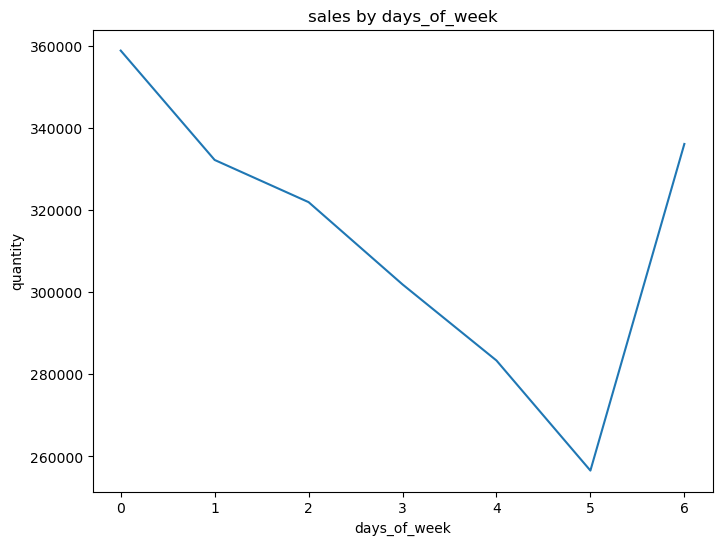

In [21]:
# groupby week 
dfw_sales = df_orders_nn.groupby(df_orders_nn.days_of_week)['quantity'].sum().to_frame()

plt.figure(figsize =(8,6))

plt.plot(dfw_sales)
plt.xlabel('days_of_week')
plt.ylabel('quantity')
plt.title('sales by days_of_week')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

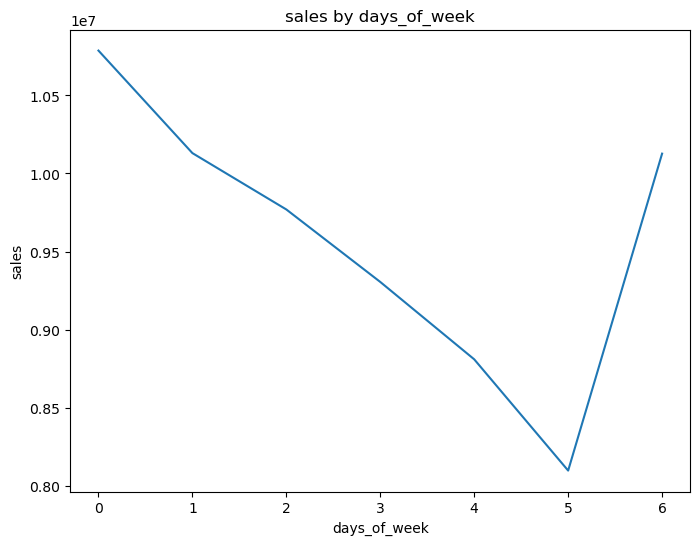

In [22]:
 # groupby week 
dfw_sales = df_orders_nn.groupby(df_orders_nn.days_of_week)['sales'].sum().to_frame()

plt.figure(figsize =(8,6))

plt.plot(dfw_sales)
plt.xlabel('days_of_week')
plt.ylabel('sales')
plt.title('sales by days_of_week')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

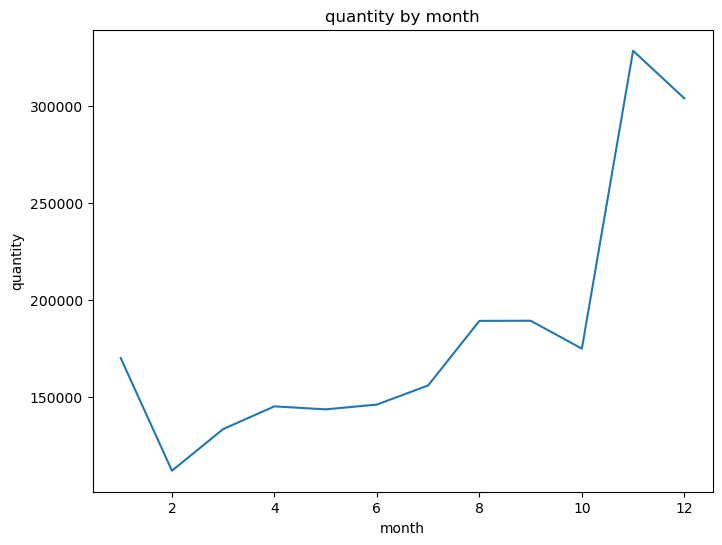

In [23]:
# groupby month
dfw_sales = df_orders_nn.groupby(df_orders_nn.month)['quantity'].sum().to_frame()

plt.figure(figsize =(8,6))

plt.plot(dfw_sales)
plt.xlabel('month')
plt.ylabel('quantity')
plt.title('quantity by month')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

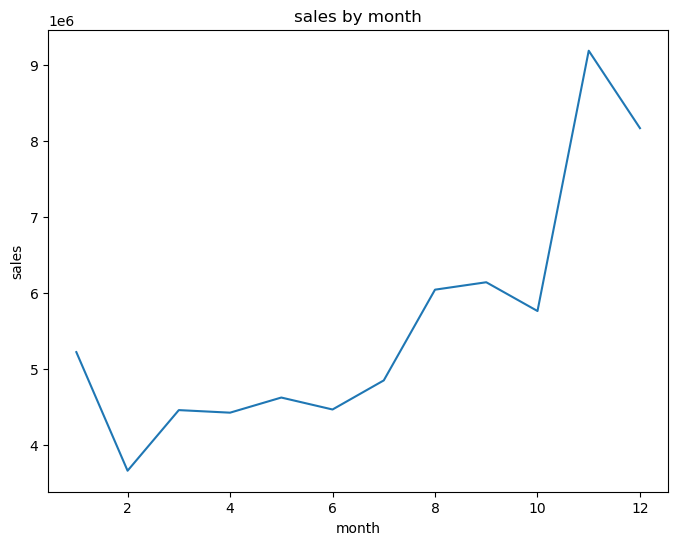

In [24]:
# groupby month
dfw_sales = df_orders_nn.groupby(df_orders_nn.month)['sales'].sum().to_frame()

plt.figure(figsize =(8,6))

plt.plot(dfw_sales)
plt.xlabel('month')
plt.ylabel('sales')
plt.title('sales by month')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

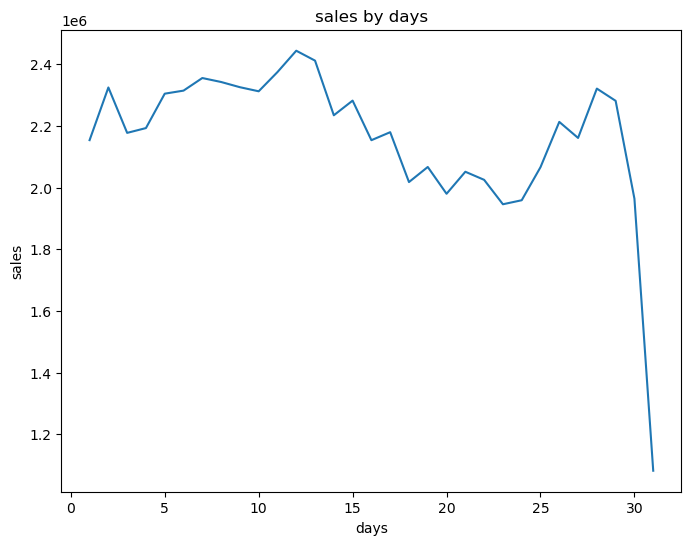

In [25]:
 # groupby week 
dfw_sales = df_orders_nn.groupby(df_orders_nn.days)['sales'].sum().to_frame()

plt.figure(figsize =(8,6))

plt.plot(dfw_sales)
plt.xlabel('days')
plt.ylabel('sales')
plt.title('sales by days')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

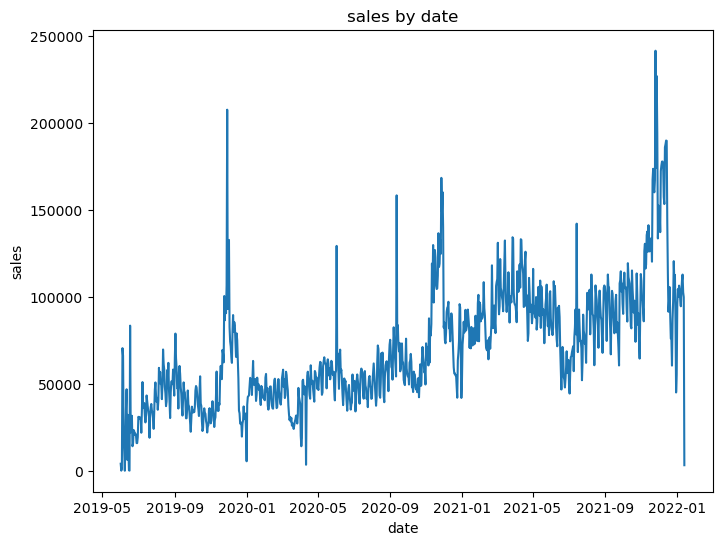

In [26]:
dfw_sales = df_orders_nn.groupby(df_orders_nn.date)['sales'].sum().to_frame()

plt.figure(figsize =(8,6))

plt.plot(dfw_sales)
plt.xlabel('date')
plt.ylabel('sales')
plt.title('sales by date')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

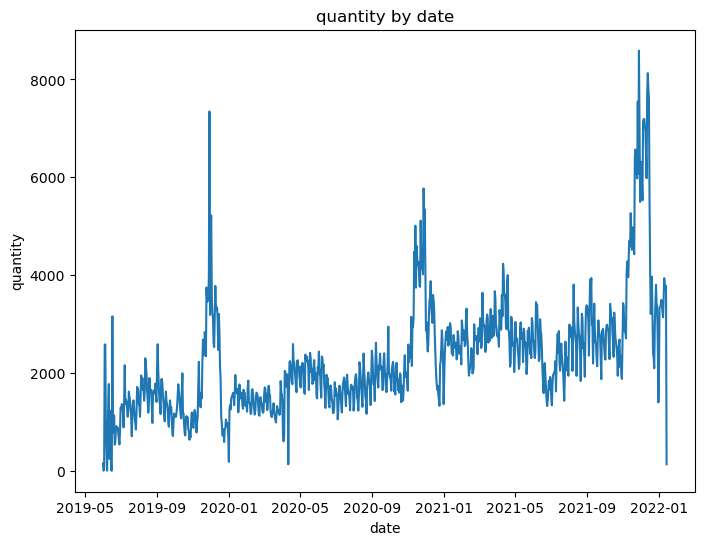

In [27]:
dfw_sales = df_orders_nn.groupby(df_orders_nn.date)['quantity'].sum().to_frame()

plt.figure(figsize =(8,6))

plt.plot(dfw_sales)
plt.xlabel('date')
plt.ylabel('quantity')
plt.title('quantity by date')
plt.show

In [28]:
# time series by different country 
table = df_orders_nn.pivot_table(index = ['date'], columns=['country'], values='quantity', aggfunc = 'sum')

<AxesSubplot:xlabel='date'>

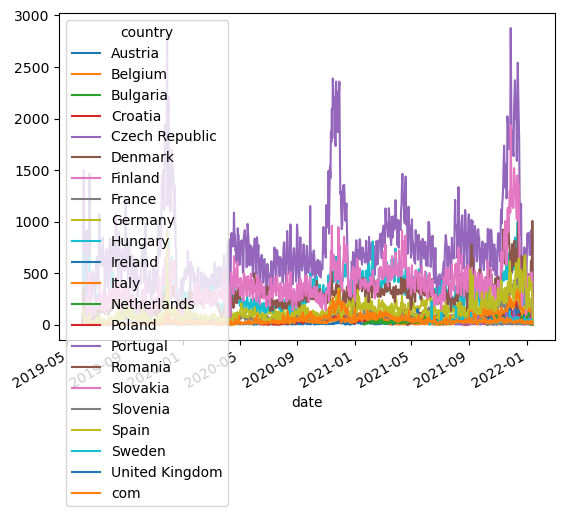

In [29]:
table.plot()

In [30]:
# Pie chart 
df_country = df_orders_nn[['country','quantity']].groupby(['country'])['quantity'].sum().sort_values(ascending=False)

In [31]:
df_country.to_frame()

,quantity
country,
Czech Republic,726357
Slovakia,367676
Hungary,293130
Romania,285719
Germany,123362
Spain,120983
France,74690
Italy,42962
Croatia,38175


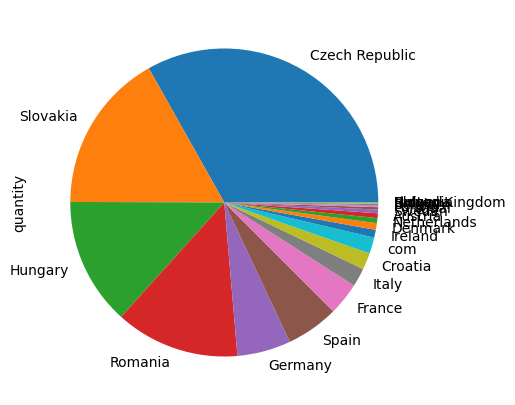

In [32]:
plot = df_country.plot.pie(y='quantity', figsize=(5,5))

<function matplotlib.pyplot.show(close=None, block=None)>

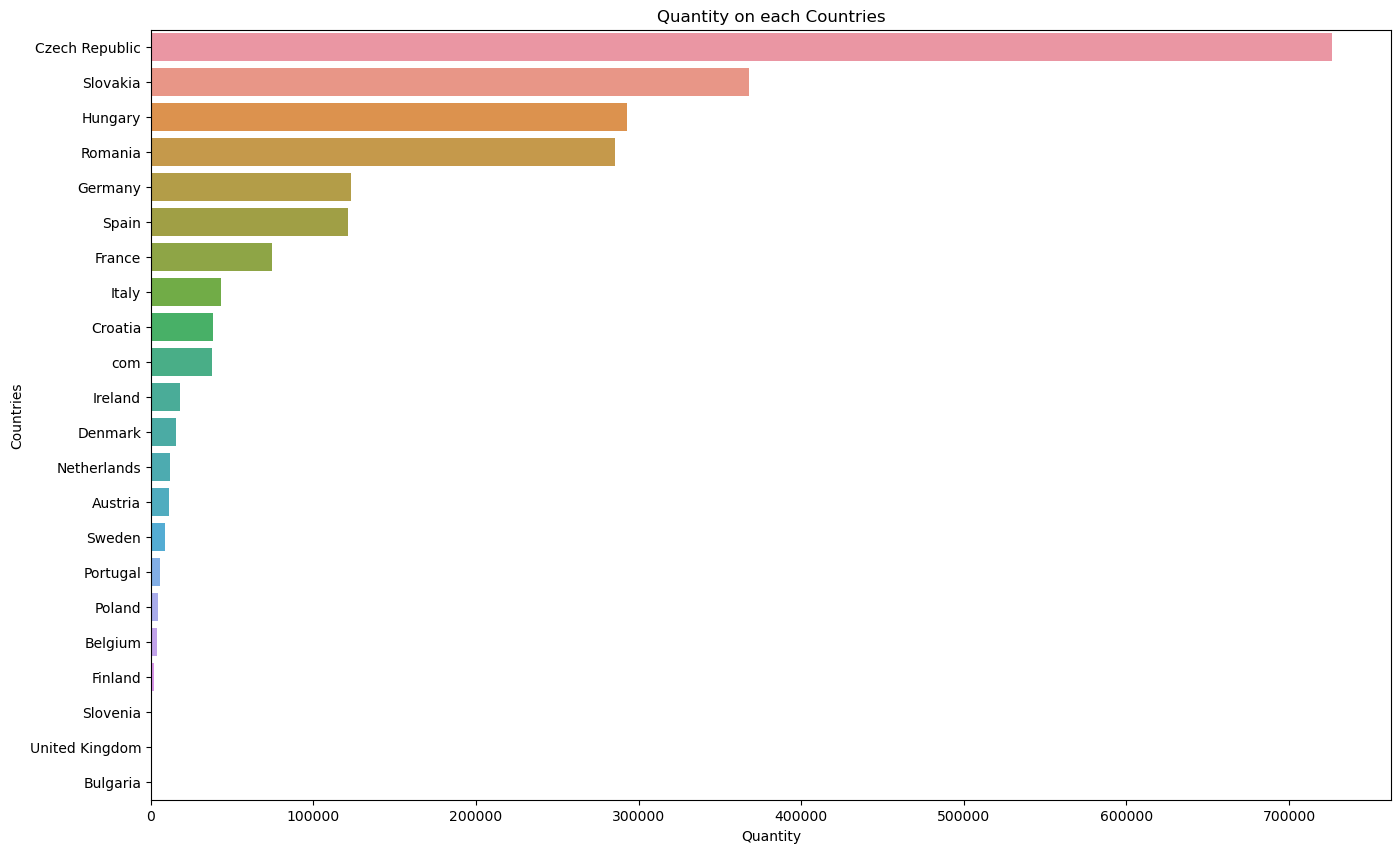

In [33]:
# quantity by each country 
df_country = df_orders_nn.groupby(['country'])['quantity'].sum().sort_values(ascending=False).to_frame()

plt.figure(figsize = (16, 10))
sns.barplot(data =df_country, x=df_country.quantity, y =df_country.index, ci=None, order=list(df_country.index))
plt.xlabel('Quantity')
plt.ylabel('Countries')
plt.title('Quantity on each Countries')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

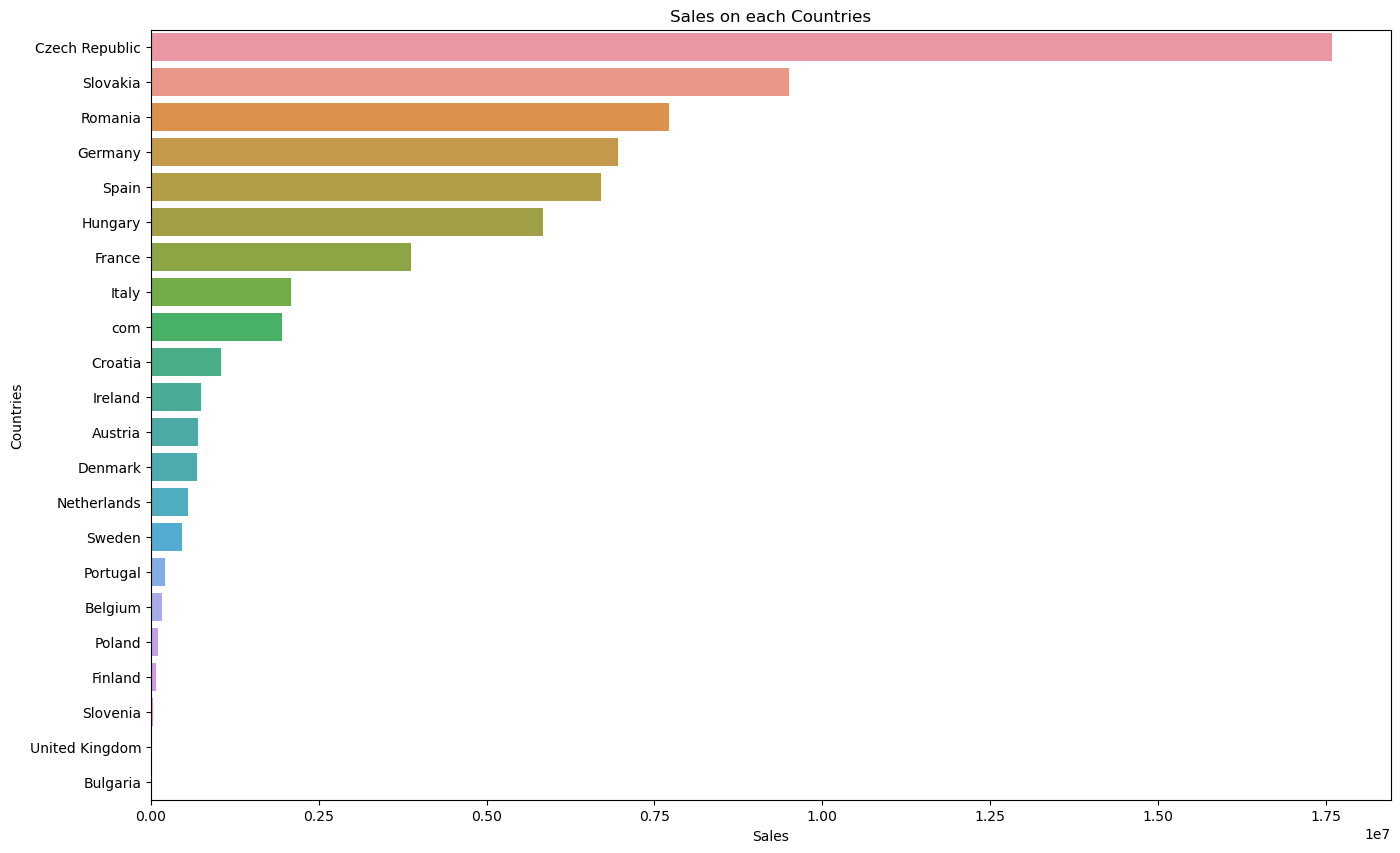

In [34]:
# quantity by each country 
df_country = df_orders_nn.groupby(['country'])['sales'].sum().sort_values(ascending=False).to_frame()

plt.figure(figsize = (16, 10))
sns.barplot(data =df_country, x=df_country.sales, y =df_country.index, ci=None, order=list(df_country.index))
plt.xlabel('Sales')
plt.ylabel('Countries')
plt.title('Sales on each Countries')

plt.show

In [35]:
##Merge 
df_orders_nn

,order_id,date,payment,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt,store_ca,location,country,days_of_week,month,days,sales
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,3.506048,0.000000,3.496395,E-COMMER,RUN.huC,RUN.huO,top4running.hu,2020-04-24 21:50:00,top4running,hu,Hungary,4,4,24,3.506048
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,-0.705913,0.000000,-0.717209,E-COMMER,RUN.huC,RUN.huO,top4running.hu,2020-04-24 21:50:00,top4running,hu,Hungary,4,4,24,-0.705913
2,2000093388,2020-04-24,COD,ZB00089178,1,5.829845,2.209302,6.472868,E-COMMER,FTB.czC,FTB.czO,11teamsports.cz,2020-04-24 21:45:00,11teamsports,cz,Czech Republic,4,4,24,5.829845
3,2000093388,2020-04-24,COD,ZB00138060,1,5.829845,2.209302,6.472868,E-COMMER,FTB.czC,FTB.czO,11teamsports.cz,2020-04-24 21:45:00,11teamsports,cz,Czech Republic,4,4,24,5.829845
4,2000093388,2020-04-24,COD,ZB00015664,1,19.379845,18.731008,32.015504,E-COMMER,FTB.czC,FTB.czO,11teamsports.cz,2020-04-24 21:45:00,11teamsports,cz,Czech Republic,4,4,24,19.379845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128516,521008123,2021-09-24,ZALOHA,S121,1,0.017442,0.000000,0.000000,E-COMMER,ECOMothC,ECOMothO,other,2021-09-24 19:37:00,other,NaN,NaN,4,9,24,0.017442
2128517,521008124,2021-09-24,ZALOHA,S121,1,0.027519,0.000000,0.000000,E-COMMER,ECOMothC,ECOMothO,other,2021-09-24 19:38:00,other,NaN,NaN,4,9,24,0.027519
2128518,521008354,2021-11-01,PREVOD_SBER,S121,1,0.025581,0.000000,0.000000,E-COMMER,ECOMothC,ECOMothO,other,2021-11-01 20:40:00,other,NaN,NaN,0,11,1,0.025581
2128522,521011437,2021-12-23,ZALOHA,S121,1,0.005039,0.000000,0.000000,E-COMMER,ECOMothC,ECOMothO,other,2021-12-23 15:58:00,other,NaN,NaN,3,12,23,0.005039


In [36]:
df_items_nn

,item_code,item_name,style,brand_id,name,group0_id,group0,group1_id,group1,group2_id,category,gender,age,color,size
0,ZB00210807,Studio Metallic LS Top,51951501,86,Puma,200.0,Apparel,230.0,T-Shirts,233.0,fitness,women,adults,Black,L
1,ZB00210813,TRAIN TECH EVOKNIT SS TEE,52011101,86,Puma,200.0,Apparel,230.0,T-Shirts,0.0,fitness,men,adults,Black,S
2,ZB00210815,TRAIN TECH EVOKNIT SS TEE,52011123,86,Puma,200.0,Apparel,230.0,T-Shirts,0.0,fitness,men,adults,Orange,L
3,ZB00210821,TRAIN TECH EVOKNIT SS TEE,52011130,86,Puma,200.0,Apparel,230.0,T-Shirts,0.0,fitness,men,adults,Yellow,XL
4,ZB00261295,LIGA Baselayer Tee LS,655920-027,86,Puma,200.0,Apparel,230.0,T-Shirts,233.0,football,men,adults,Green,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308796,ZB00276156,UA W Charged Impulse,3021967-002,106,Under Armour,100.0,Footwear,120.0,Running shoes,0.0,running,women,adults,Black,"36,5"
308800,ZB00276185,UA W Charged Rogue 25 Storm,3025246-001,106,Under Armour,100.0,Footwear,120.0,Running shoes,0.0,running,women,adults,Black,39
308813,ZB00201289,UA Charged Pursuit 2,3022594-401,106,Under Armour,100.0,Footwear,120.0,Running shoes,0.0,running,men,adults,Blue,43
308814,ZB00276098,UA CG Armour Fitted Mock,1366066-001,106,Under Armour,200.0,Apparel,230.0,T-Shirts,233.0,fitness,men,adults,Black,L


In [37]:
df_total = pd.merge(df_orders_nn, df_items_nn, on='item_code', how='left')

In [38]:
df_total.shape

(2127863, 34)

In [39]:
df_orders_nn.shape

(2127863, 20)

In [40]:
df_items_nn.shape

(255525, 15)

In [41]:
df_total.head(4)

,order_id,date,payment,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,...,group0_id,group0,group1_id,group1,group2_id,category,gender,age,color,size
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,3.506048,0.000000,3.496395,E-COMMER,RUN.huC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,-0.705913,0.000000,-0.717209,E-COMMER,RUN.huC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000093388,2020-04-24,COD,ZB00089178,1,5.829845,2.209302,6.472868,E-COMMER,FTB.czC,...,200.0,Apparel,290.0,Socks,291.0,football,unisex,adults,Silver,3
3,2000093388,2020-04-24,COD,ZB00138060,1,5.829845,2.209302,6.472868,E-COMMER,FTB.czC,...,200.0,Apparel,290.0,Socks,291.0,football,unisex,adults,Pink,39-42


In [42]:
df_total.columns

Index(['order_id', 'date', 'payment', 'item_code', 'quantity',
       'unit_price_vat_excl', 'unit_cogs', 'unit_rrp_vat_excl', 'department',
       'channel', 'owner', 'site', 'CreatedAt', 'store_ca', 'location',
       'country', 'days_of_week', 'month', 'days', 'sales', 'item_name',
       'style', 'brand_id', 'name', 'group0_id', 'group0', 'group1_id',
       'group1', 'group2_id', 'category', 'gender', 'age', 'color', 'size'],
      dtype='object')

In [43]:
df_total.isnull().sum()

order_id                    0
date                        0
payment                     0
item_code                   0
quantity                    0
unit_price_vat_excl         0
unit_cogs                   0
unit_rrp_vat_excl           0
department                  0
channel                     0
owner                       0
site                        0
CreatedAt                   0
store_ca                    0
location                   46
country                    46
days_of_week                0
month                       0
days                        0
sales                       0
item_name              839482
style                  839482
brand_id               839482
name                   839482
group0_id              839482
group0                 839482
group1_id              839482
group1                 839482
group2_id              839482
category               839482
gender                 839482
age                    839482
color                  839482
size      

<function matplotlib.pyplot.show(close=None, block=None)>

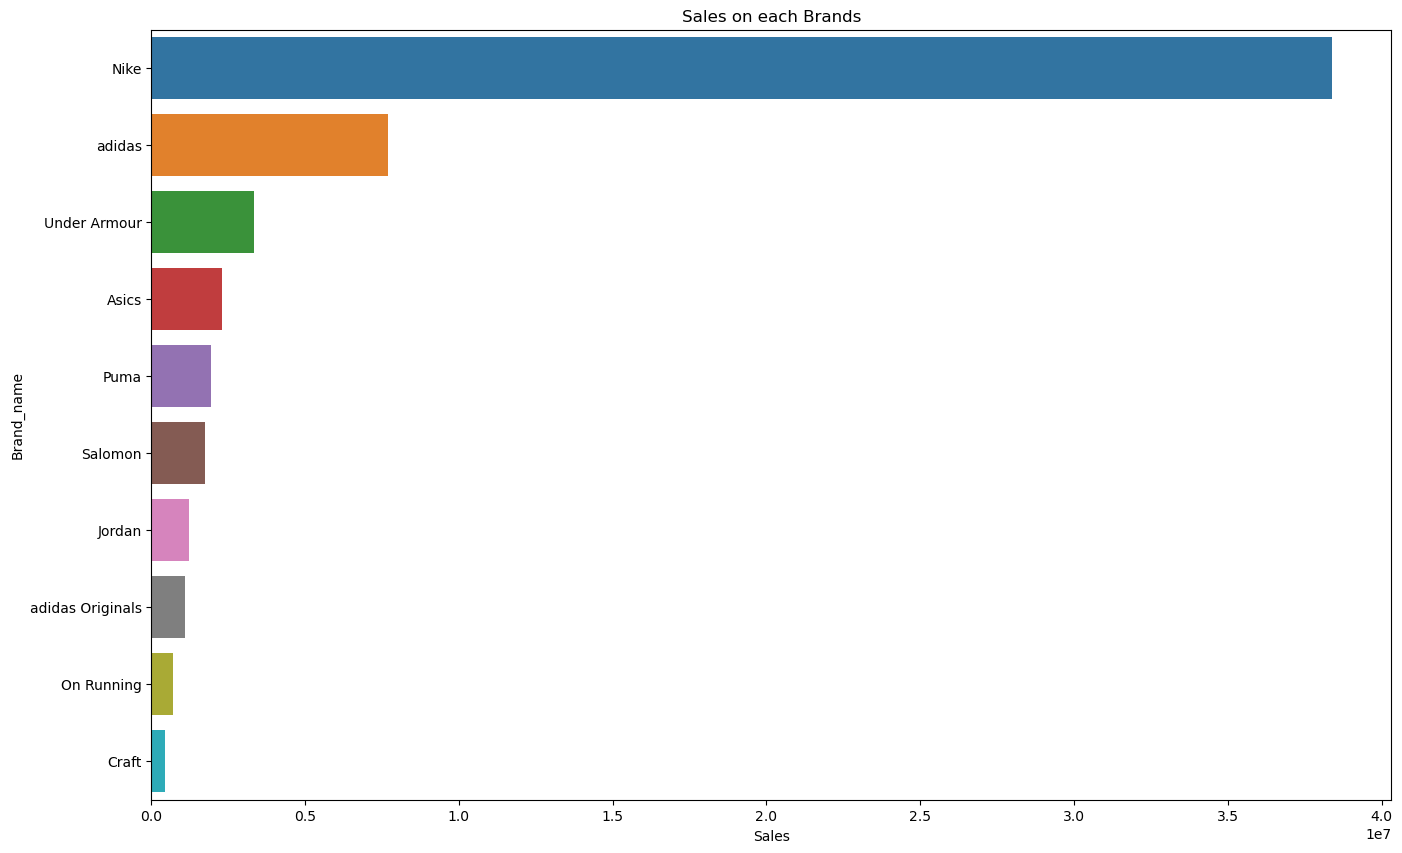

In [44]:
# quantity by each country 
Brand = df_total.groupby(['name'])['sales'].sum().sort_values(ascending=False).to_frame().head(10)

plt.figure(figsize = (16, 10))
sns.barplot(data =Brand, x=Brand.sales, y =Brand.index, ci=None, order=list(Brand.index))
plt.xlabel('Sales')
plt.ylabel('Brand_name')
plt.title('Sales on each Brands')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

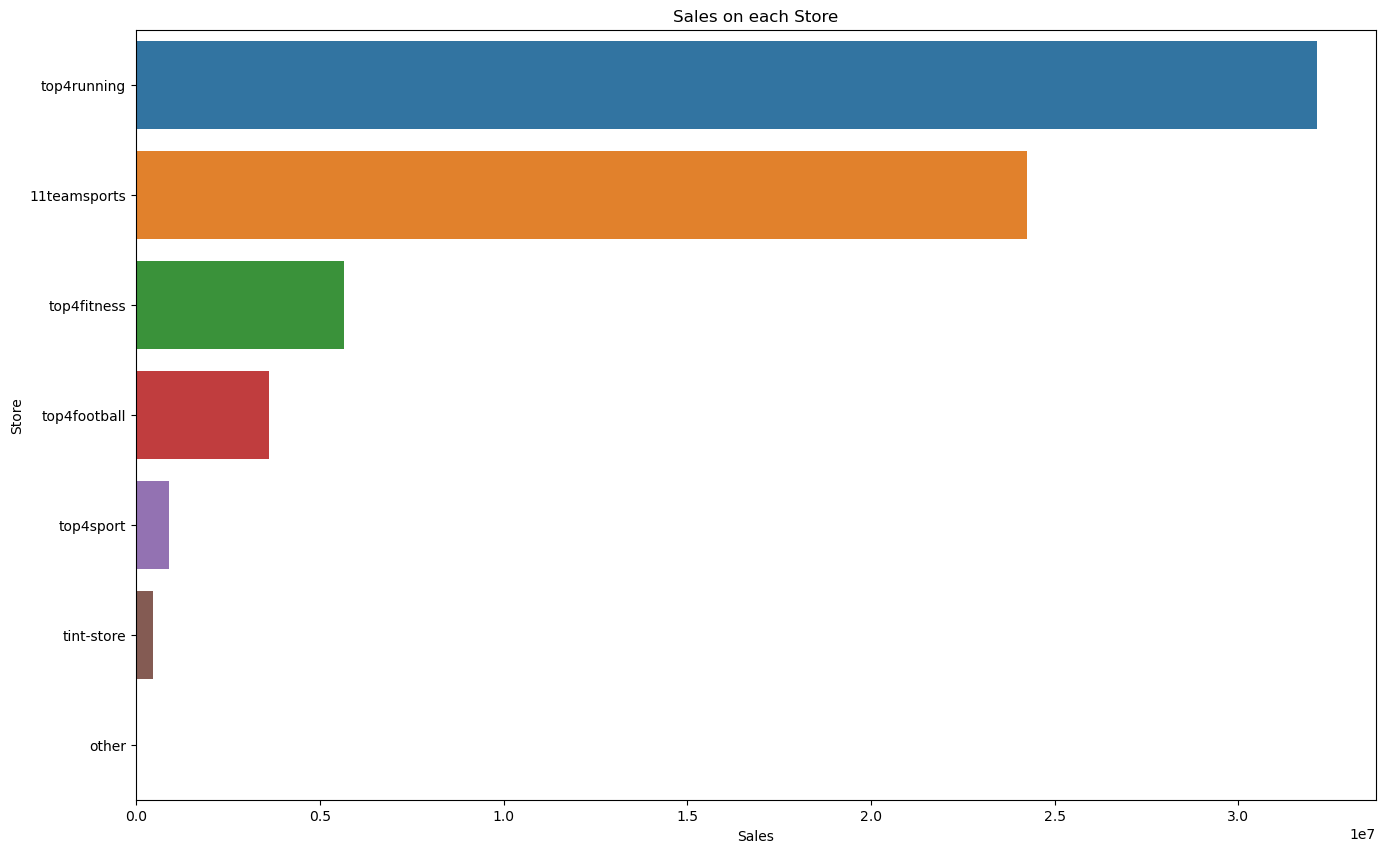

In [45]:
# quantity by each country 
store = df_total.groupby(['store_ca'])['sales'].sum().sort_values(ascending=False).to_frame()

plt.figure(figsize = (16, 10))
sns.barplot(data =store, x=store.sales, y =store.index, order=list(store.index))
plt.xlabel('Sales')
plt.ylabel('Store')
plt.title('Sales on each Store')

plt.show

Text(0.5, 1.0, 'Quantity on Different Color')

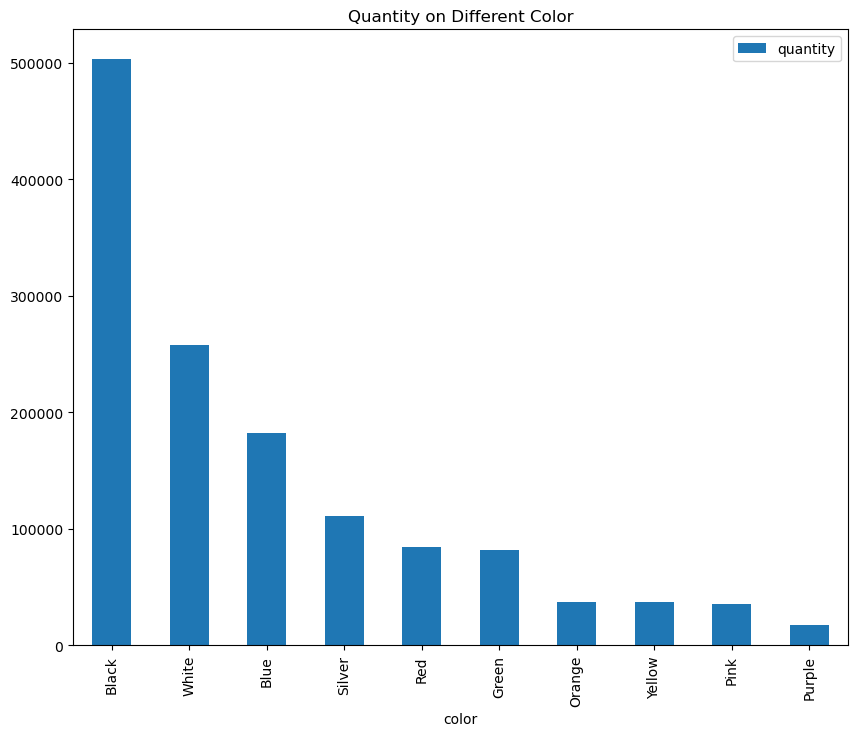

In [46]:
#Graph
#Color
Color = df_total.groupby(['color'])['quantity'].sum().sort_values(ascending=False).to_frame().head(10)

Color.plot(kind='bar',figsize=(10,8))
plt.title('Quantity on Different Color')

In [47]:
#Gender 
Gender= df_total.groupby(['gender'])['quantity'].sum().sort_values(ascending=False).to_frame()
Gender
#plot = Gender.plot.pie(y='quantity', figsize=(5,5))

,quantity
gender,
men,697769
unisex,485032
women,195421


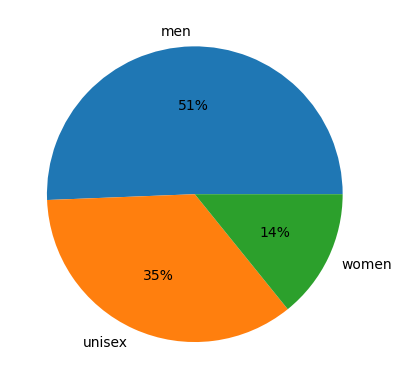

In [48]:
data = [697769, 485032, 195421]
labels = ['men', 'unisex', 'women']

#define Seaborn color palette to use
colors = sns.color_palette()

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
                                                 
plt.show()

In [49]:
df_total.columns

Index(['order_id', 'date', 'payment', 'item_code', 'quantity',
       'unit_price_vat_excl', 'unit_cogs', 'unit_rrp_vat_excl', 'department',
       'channel', 'owner', 'site', 'CreatedAt', 'store_ca', 'location',
       'country', 'days_of_week', 'month', 'days', 'sales', 'item_name',
       'style', 'brand_id', 'name', 'group0_id', 'group0', 'group1_id',
       'group1', 'group2_id', 'category', 'gender', 'age', 'color', 'size'],
      dtype='object')

In [57]:
#Distribution 
df_total_final = df_total

In [50]:
# df_total_final = df_total[['order_id', 'date', 
#                           'quantity', 'unit_price_vat_excl',
#                           'department','store_ca', 
#                           'country', 'days_of_week', 
#                           'month', 'days', 'sales', 'name']]

In [58]:
df_total_final.to_csv('merge_data.csv')

In [52]:
df_total_final.isnull().sum()

order_id                    0
date                        0
quantity                    0
unit_price_vat_excl         0
department                  0
store_ca                    0
country                    46
days_of_week                0
month                       0
days                        0
sales                       0
name                   839482
dtype: int64

In [54]:
### FInal for all merge clean data
df_final_m = df_total.dropna()

In [55]:
df_final_m.isnull().sum()

order_id               0
date                   0
payment                0
item_code              0
quantity               0
unit_price_vat_excl    0
unit_cogs              0
unit_rrp_vat_excl      0
department             0
channel                0
owner                  0
site                   0
CreatedAt              0
store_ca               0
location               0
country                0
days_of_week           0
month                  0
days                   0
sales                  0
item_name              0
style                  0
brand_id               0
name                   0
group0_id              0
group0                 0
group1_id              0
group1                 0
group2_id              0
category               0
gender                 0
age                    0
color                  0
size                   0
dtype: int64

In [56]:
df_final_m.to_csv('merge_data_ml.csv')